In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img= cv2.imread(r'C:\Users\visha\Downloads\aishwarya_rai.jpg')
img.shape

(263, 186, 3)

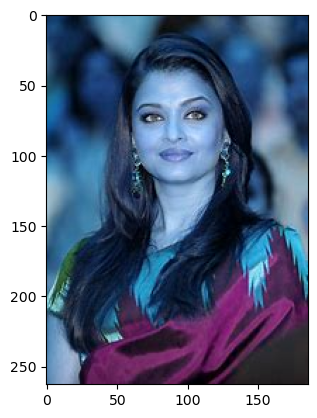

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(263, 186)

In [5]:
gray


array([[ 56,  57,  61, ...,  61,  57,  57],
       [ 58,  60,  63, ...,  59,  56,  56],
       [ 60,  62,  65, ...,  58,  56,  56],
       ...,
       [136, 137, 141, ...,  33,  34,  34],
       [135, 136, 141, ...,  31,  35,  35],
       [135, 136, 141, ...,  30,  37,  37]], dtype=uint8)

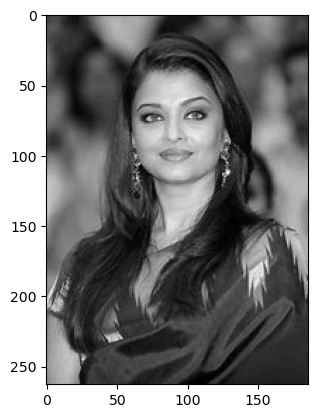

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade= cv2.CascadeClassifier('D:\DATA SCIENCE PROJECTS\opencv\data\haarcascades\haarcascade_frontalface_default.xml')

eye_cascade= cv2.CascadeClassifier('D:\DATA SCIENCE PROJECTS\opencv\data\haarcascades\haarcascade_eye.xml')

faces= face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[50, 40, 84, 84]])

In [8]:
(x,y,w,h)=faces[0]
x,y,w,h

(50, 40, 84, 84)

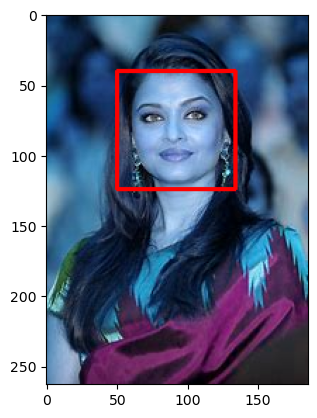

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

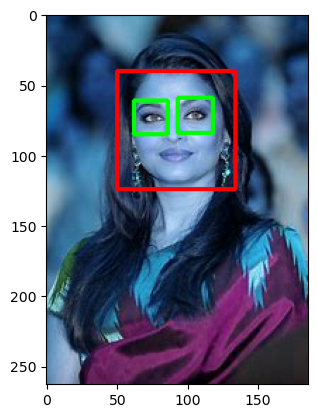

In [10]:
cv2.destroyAllWindows()
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = face_img[y:y + h, x:x + w]
    
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


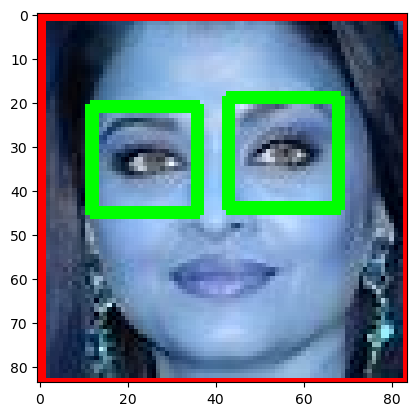

In [11]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color


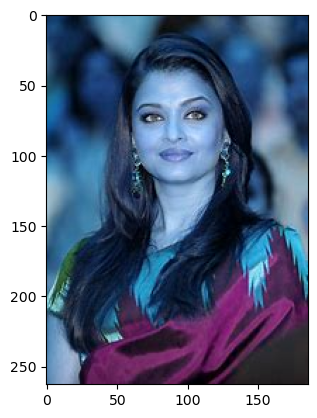

In [13]:
original_image=cv2.imread(r'C:\Users\visha\Downloads\aishwarya_rai.jpg')
plt.imshow(original_image)

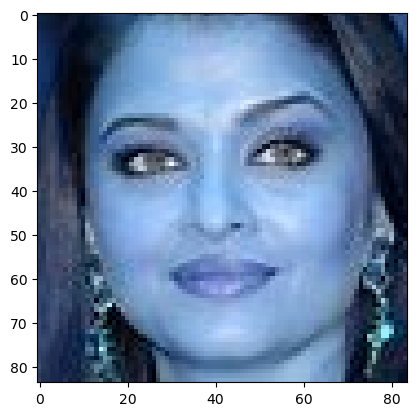

In [14]:
cropped_image=get_cropped_image_if_2_eyes(r'C:\Users\visha\Downloads\aishwarya_rai.jpg')
plt.imshow(cropped_image)

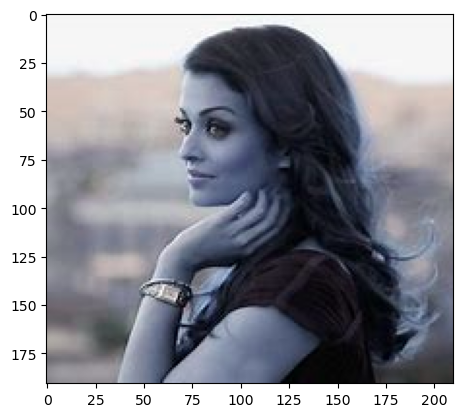

In [15]:
org_image_obstructed=cv2.imread(r'C:\Users\visha\Downloads\aishwarya_rai2.jpg')
plt.imshow(org_image_obstructed)

In [16]:
cropped_image_no_2_eyes=get_cropped_image_if_2_eyes(r'C:\Users\visha\Downloads\aishwarya_rai2.jpg')
cropped_image_no_2_eyes

In [17]:
path_to_data=r"C:\Users\visha\Downloads\Bollywood Actor Images\Bollywood Actor Images"
path_to_cr_data=r"C:\Users\visha\Downloads\Bollywood Actor Images\cropped"

In [18]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs


['C:\\Users\\visha\\Downloads\\Bollywood Actor Images\\Bollywood Actor Images\\abhay_deol',
 'C:\\Users\\visha\\Downloads\\Bollywood Actor Images\\Bollywood Actor Images\\adil_hussain',
 'C:\\Users\\visha\\Downloads\\Bollywood Actor Images\\Bollywood Actor Images\\ajay_devgn',
 'C:\\Users\\visha\\Downloads\\Bollywood Actor Images\\Bollywood Actor Images\\akshaye_khanna',
 'C:\\Users\\visha\\Downloads\\Bollywood Actor Images\\Bollywood Actor Images\\akshay_kumar',
 'C:\\Users\\visha\\Downloads\\Bollywood Actor Images\\Bollywood Actor Images\\amitabh_bachchan',
 'C:\\Users\\visha\\Downloads\\Bollywood Actor Images\\Bollywood Actor Images\\amjad_khan',
 'C:\\Users\\visha\\Downloads\\Bollywood Actor Images\\Bollywood Actor Images\\amole_gupte',
 'C:\\Users\\visha\\Downloads\\Bollywood Actor Images\\Bollywood Actor Images\\amol_palekar',
 'C:\\Users\\visha\\Downloads\\Bollywood Actor Images\\Bollywood Actor Images\\amrish_puri',
 'C:\\Users\\visha\\Downloads\\Bollywood Actor Images\\Bollywo

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
#import os
#import cv2

cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]  # Extract celebrity name
    print(celebrity_name)

    # Ensure the dictionary has an entry for the celebrity
    if celebrity_name not in celebrity_file_names_dict:
        celebrity_file_names_dict[celebrity_name] = []  # Initialize empty list

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + "\\" + celebrity_name
            print(cropped_folder)
            
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder:", cropped_folder)

            cropped_file_name = celebrity_name + str(count) + ".png"
            print(cropped_file_name)
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)

            # Append the cropped file path to the dictionary
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1


abhay_deol
C:\Users\visha\Downloads\Bollywood Actor Images\cropped\abhay_deol
Generating cropped images in folder: C:\Users\visha\Downloads\Bollywood Actor Images\cropped\abhay_deol
abhay_deol1.png
C:\Users\visha\Downloads\Bollywood Actor Images\cropped\abhay_deol
abhay_deol2.png
C:\Users\visha\Downloads\Bollywood Actor Images\cropped\abhay_deol
abhay_deol3.png
C:\Users\visha\Downloads\Bollywood Actor Images\cropped\abhay_deol
abhay_deol4.png
C:\Users\visha\Downloads\Bollywood Actor Images\cropped\abhay_deol
abhay_deol5.png
C:\Users\visha\Downloads\Bollywood Actor Images\cropped\abhay_deol
abhay_deol6.png
C:\Users\visha\Downloads\Bollywood Actor Images\cropped\abhay_deol
abhay_deol7.png
C:\Users\visha\Downloads\Bollywood Actor Images\cropped\abhay_deol
abhay_deol8.png
C:\Users\visha\Downloads\Bollywood Actor Images\cropped\abhay_deol
abhay_deol9.png
C:\Users\visha\Downloads\Bollywood Actor Images\cropped\abhay_deol
abhay_deol10.png
C:\Users\visha\Downloads\Bollywood Actor Images\croppe

In [22]:
celebrity_file_names_dict

{'abhay_deol': ['C:\\Users\\visha\\Downloads\\Bollywood Actor Images\\cropped\\abhay_deol/abhay_deol1.png',
  'C:\\Users\\visha\\Downloads\\Bollywood Actor Images\\cropped\\abhay_deol/abhay_deol2.png',
  'C:\\Users\\visha\\Downloads\\Bollywood Actor Images\\cropped\\abhay_deol/abhay_deol3.png',
  'C:\\Users\\visha\\Downloads\\Bollywood Actor Images\\cropped\\abhay_deol/abhay_deol4.png',
  'C:\\Users\\visha\\Downloads\\Bollywood Actor Images\\cropped\\abhay_deol/abhay_deol5.png',
  'C:\\Users\\visha\\Downloads\\Bollywood Actor Images\\cropped\\abhay_deol/abhay_deol6.png',
  'C:\\Users\\visha\\Downloads\\Bollywood Actor Images\\cropped\\abhay_deol/abhay_deol7.png',
  'C:\\Users\\visha\\Downloads\\Bollywood Actor Images\\cropped\\abhay_deol/abhay_deol8.png',
  'C:\\Users\\visha\\Downloads\\Bollywood Actor Images\\cropped\\abhay_deol/abhay_deol9.png',
  'C:\\Users\\visha\\Downloads\\Bollywood Actor Images\\cropped\\abhay_deol/abhay_deol10.png',
  'C:\\Users\\visha\\Downloads\\Bollywood Act

In [23]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    
    # Convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    
    # Convert to float
    imArray = np.float32(imArray)
    imArray /= 255
    
    # Compute wavelet coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    # Process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0  # Set approximation coefficients to zero
    
    # Reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)

    return imArray_H


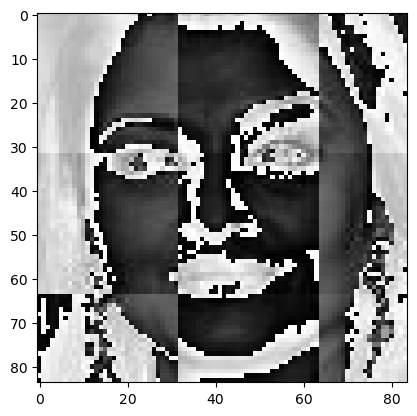

In [24]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [25]:
#The input to our classifier (w2d) will now be a raw image and then stacked on by the wavelet transformed image. 

In [26]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count+=1
class_dict

{'abhay_deol': 0,
 'adil_hussain': 1,
 'ajay_devgn': 2,
 'akshaye_khanna': 3,
 'akshay_kumar': 4,
 'amitabh_bachchan': 5,
 'amjad_khan': 6,
 'amole_gupte': 7,
 'amol_palekar': 8,
 'amrish_puri': 9,
 'anil_kapoor': 10,
 'annu_kapoor': 11,
 'anupam_kher': 12,
 'anushka_shetty': 13,
 'arshad_warsi': 14,
 'aruna_irani': 15,
 'ashish_vidyarthi': 16,
 'asrani': 17,
 'atul_kulkarni': 18,
 'ayushmann_khurrana': 19,
 'boman_irani': 20,
 'chiranjeevi': 21,
 'chunky_panday': 22,
 'danny_denzongpa': 23,
 'darsheel_safary': 24,
 'deepika_padukone': 25,
 'deepti_naval': 26,
 'dev_anand': 27,
 'dharmendra': 28,
 'dilip_kumar': 29,
 'dimple_kapadia': 30,
 'farhan_akhtar': 31,
 'farida_jalal': 32,
 'farooq_shaikh': 33,
 'girish_karnad': 34,
 'govinda': 35,
 'gulshan_grover': 36,
 'hrithik_roshan': 37,
 'huma_qureshi': 38,
 'irrfan_khan': 39,
 'jaspal_bhatti': 40,
 'jeetendra': 41,
 'jimmy_sheirgill': 42,
 'johnny_lever': 43,
 'kader_khan': 44,
 'kajol': 45,
 'kalki_koechlin': 46,
 'kamal_haasan': 47,
 

In [27]:
x=[]
y=[]

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img= cv2.resize(img,(32,32))
        img_har= w2d(img,'db1',5)
        scalled_img_har= cv2.resize(img_har, (32,32))
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(celebrity_name)

In [29]:
len(x[0]),y[0]

(4096, 'abhay_deol')

In [30]:
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape

(3574, 4096)

In [31]:
x[0]

array([201., 210., 220., ..., 240., 138., 191.])

In [32]:
#Data cleaning process is done, now we will train our model 

In [33]:
#We will use svm(support vector machine) with rbf kernel tuned with heuristic finetuning


In [34]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

pipe= Pipeline([('scaler',StandardScaler()), ('svc', SVC(kernel= 'rbf', C=10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.34675615212527966

In [36]:
len(x_test)

894

In [37]:
print(classification_report(y_test, pipe.predict(x_test)))

                      precision    recall  f1-score   support

          abhay_deol       0.29      0.20      0.24        10
        adil_hussain       0.25      0.12      0.17         8
          ajay_devgn       0.00      0.00      0.00         1
        akshay_kumar       0.40      0.67      0.50         3
      akshaye_khanna       0.38      0.75      0.50         4
    amitabh_bachchan       0.00      0.00      0.00         2
          amjad_khan       0.08      0.25      0.12         4
        amol_palekar       0.00      0.00      0.00         7
         amole_gupte       1.00      0.50      0.67         4
         amrish_puri       1.00      0.43      0.60         7
         anil_kapoor       1.00      0.20      0.33         5
         annu_kapoor       0.00      0.00      0.00         7
         anupam_kher       0.33      0.43      0.38         7
      anushka_shetty       0.18      0.20      0.19        10
        arshad_warsi       0.00      0.00      0.00         5
       

C:\Users\visha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\visha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\visha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:
#The test provides f1 score

In [39]:
#Now we use GridSearch to try out different models with different parameters. Goal is to come up with the best model with best fine tuned parameters

In [40]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [41]:
model_params={
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params':{
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression':{
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logisticregression__C': [1,5,10]
        }
    }
}

In [42]:
scores = []
best_estimators = {}

import pandas as pd

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp["model"])
    clf = GridSearchCV(pipe, mp["params"], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df


C:\Users\visha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\visha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\visha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\visha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\visha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in 

,model,best_score,best_params
0,svm,0.347761,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.098134,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.300000,{'logisticregression__C': 1}


In [52]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [53]:
best_estimators['svm'].score(x_test,y_test)

0.37472035794183445

In [54]:
best_estimators['random_forest'].score(x_test,y_test)

0.12639821029082773

In [55]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.31655480984340045

In [56]:
best_clf=best_estimators['svm']

In [57]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[4, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 4, 0, 0],
       [0, 0, 0, ..., 0, 4, 0],
       [0, 0, 0, ..., 0, 0, 3]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

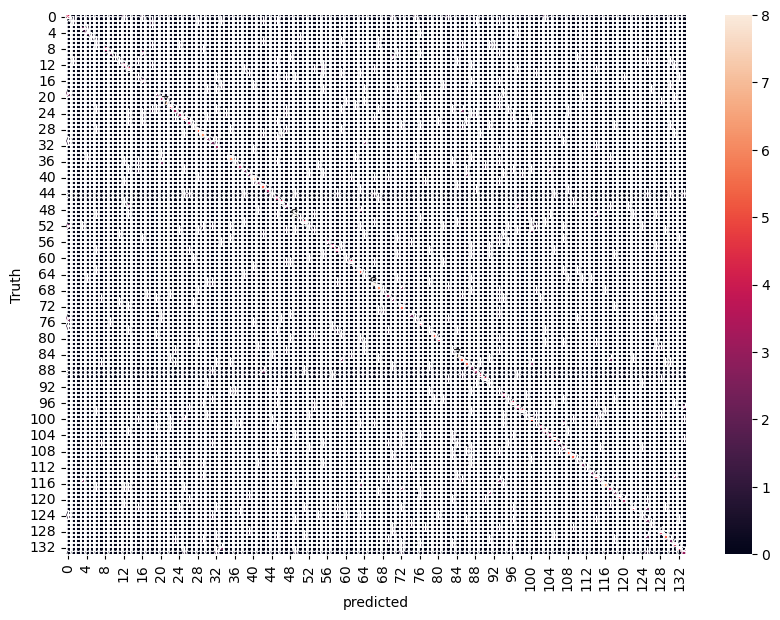

In [58]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [59]:
#Now we save the trained model

In [60]:
!pip install joblib
import joblib
#save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [61]:
#Now we save class dictionary

In [63]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))